In [1]:
import seaborn as sns
import polars as pl
sns.set_theme()

<Axes: >

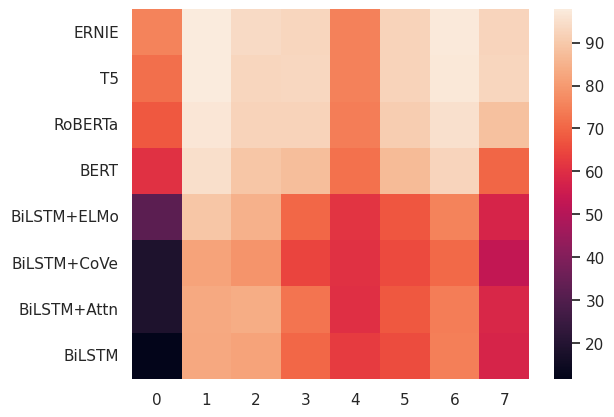

In [2]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score", aggregate_function=None)
sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'])

<Axes: >

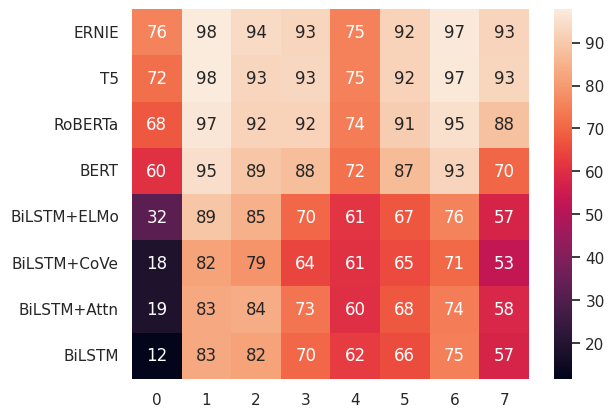

In [3]:
sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'], annot=True)

<Axes: >

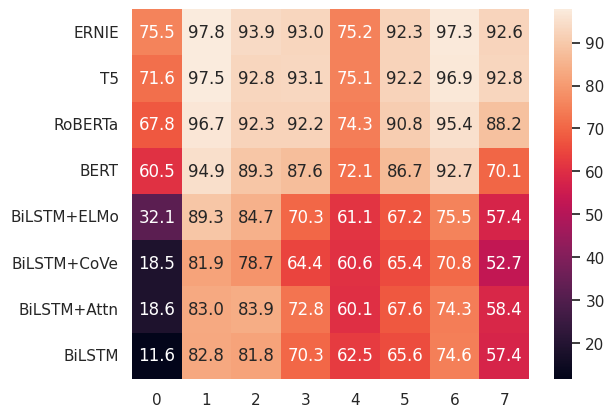

In [4]:
sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'], annot=True, fmt=".1f")

In [5]:
glue.to_pandas().set_index('Model').rank(axis='columns')

,CoLA,SST-2,MRPC,STS-B,QQP,MNLI,QNLI,RTE
Model,,,,,,,,
ERNIE,2.0,8.0,6.0,5.0,1.0,3.0,7.0,4.0
T5,1.0,8.0,4.5,6.0,2.0,3.0,7.0,4.5
RoBERTa,1.0,8.0,6.0,5.0,2.0,4.0,7.0,3.0
BERT,1.0,8.0,6.0,5.0,3.0,4.0,7.0,2.0
BiLSTM+ELMo,1.0,8.0,7.0,5.0,3.0,4.0,6.0,2.0
BiLSTM+CoVe,1.0,8.0,7.0,4.0,3.0,5.0,6.0,2.0
BiLSTM+Attn,1.0,7.0,8.0,5.0,3.0,4.0,6.0,2.0
BiLSTM,1.0,8.0,7.0,5.0,3.0,4.0,6.0,2.0


In [6]:
import polars as pl
rank = pl.col("").rank(descending=False)
ranks = glue.select(pl.concat_list(pl.all().exclude("Model")).alias("all_scores")).select(
    pl.col("all_scores").arr.eval(rank, parallel=True).alias("scores_rank")
)
annot = ranks.select([pl.col('scores_rank').arr.get(i).alias(f'rank_{i}') for i in range(8)])

<Axes: >

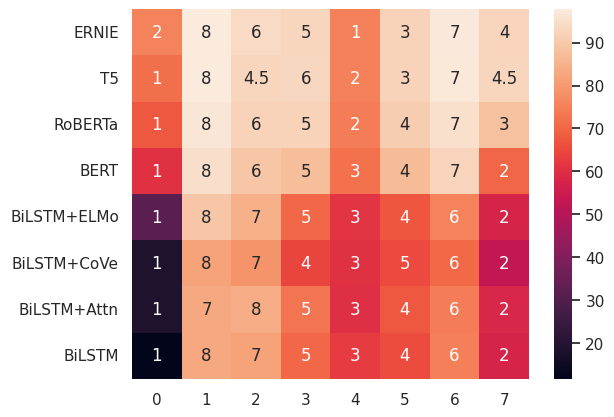

In [7]:
sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'], annot=annot)

<Axes: >

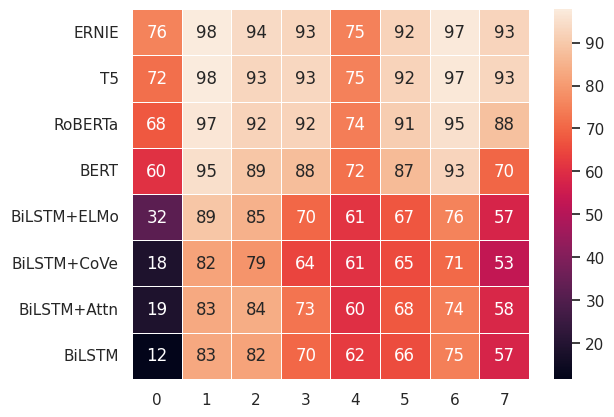

In [8]:
sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'], annot=True, linewidth=.5)

<Axes: >

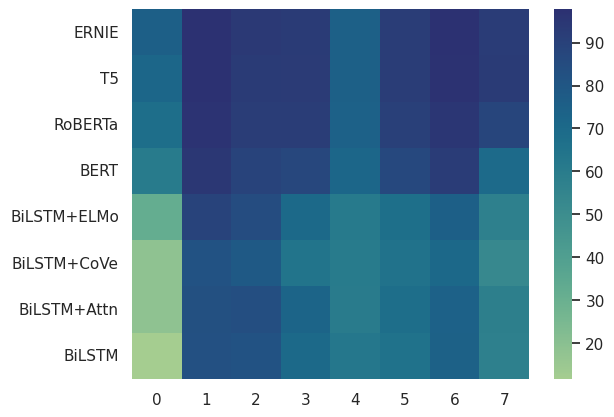

In [9]:
sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'], cmap="crest")

<Axes: >

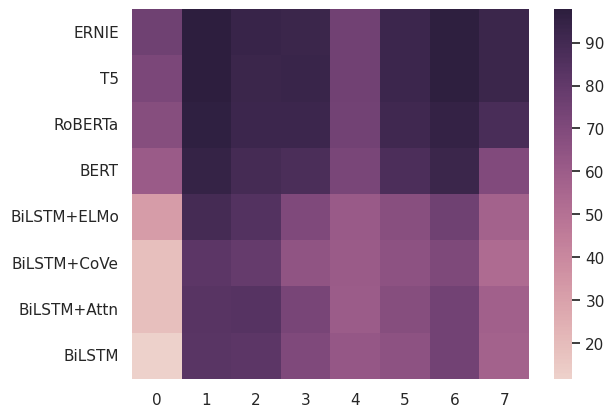

In [10]:
sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'], cmap=sns.cubehelix_palette(as_cmap=True))

<Axes: >

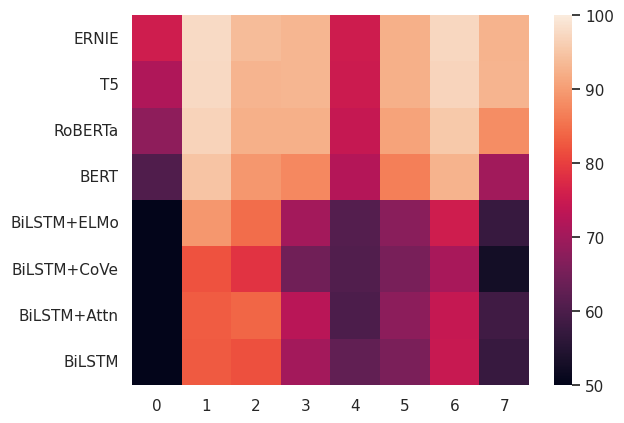

In [11]:
sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'], vmin=50, vmax=100)

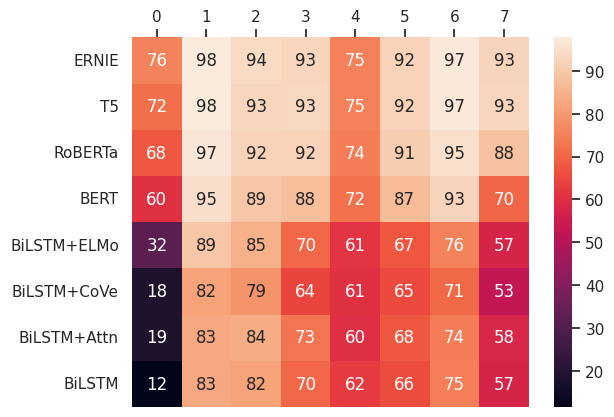

In [12]:
ax = sns.heatmap(glue.drop('Model'), yticklabels=glue['Model'], annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()